# 🌍 World Happiness Report 2021 — Exploratory Data Analysis



## 📌 Objective
This project aims to explore the **2021 World Happiness Report** dataset through step-by-step exploratory data analysis (EDA).  
We'll analyze how various social, economic, and health-related factors affect the **Happiness Score** of different countries.

---

## 📊 Dataset Description
- **Source**: [Kaggle - World Happiness Report 2021](https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021)
- **Rows**: 149 countries
- **Columns**: 20 metrics including happiness score, economic indicators, health, freedom, social support, generosity, and corruption.

---

## 📘 Column Definitions (Before Cleaning)

| Column Name | Description |
|-------------|-------------|
| `Country name` | Country being evaluated |
| `Regional indicator` | Geographical region of the country |
| `Ladder score` | Happiness score (target) — based on citizen life evaluations |
| `Standard error of ladder score` | Standard error associated with ladder score |
| `upperwhisker` | Upper bound used for visualization (boxplot) |
| `lowerwhisker` | Lower bound used for visualization (boxplot) |
| `Logged GDP per capita` | Log-transformed GDP per capita |
| `Social support` | Perceived social support |
| `Healthy life expectancy` | Expected years of healthy living |
| `Freedom to make life choices` | Citizen's freedom to make life decisions |
| `Generosity` | Tendency to donate/help others |
| `Perceptions of corruption` | Perceived corruption in government and business |
| `Ladder score in Dystopia` | Hypothetical worst-case baseline score |
| `Explained by: Log GDP per capita` | Contribution of GDP to happiness score |
| `Explained by: Social support` | Contribution of social support |
| `Explained by: Healthy life expectancy` | Contribution of life expectancy |
| `Explained by: Freedom to make life choices` | Contribution of freedom |
| `Explained by: Generosity` | Contribution of generosity |
| `Explained by: Perceptions of corruption` | Contribution of perceived corruption |
| `Dystopia + residual` | Remaining score not explained by other factors |

> 🧠 The “Explained by: …” and “Dystopia” columns form a **decomposition** of the happiness score, which we’ll exclude in our core EDA to keep things focused.

---

### ❓ What is "Dystopia"?
> A fictional country with the lowest values for all metrics. Used as a baseline to compare how much each factor adds to a country's happiness score.

---

## ⚙️ EDA Roadmap

1. **Dataset Overview**
2. **Data Cleaning & Preprocessing**
3. **Univariate Analysis**
4. **Bivariate & Correlation Analysis**
5. **Regional & Country-Level Comparisons**
6. **Conclusions & Insights**

---




## 💼 Business-Oriented Questions

The following questions frame the EDA from a business or policymaking perspective. They can guide stakeholders like governments, NGOs, or analysts seeking actionable insights.

---

### 📌 Strategic & Policy-Driven

1. **Which factors should governments prioritize if they aim to improve national happiness quickly and effectively?**

2. **Which countries overperform or underperform in happiness compared to their GDP level?**

3. **Is investing in healthcare (Life Expectancy) more impactful on happiness than investing in economic growth (GDP)?**

4. **What is the average difference in happiness between high-income and low-income regions?**

5. **Which regions have low corruption scores but still suffer low happiness? What other factors could explain this?**

---

### 📊 Comparative & Insight-Driven

6. **How do the happiest countries compare in terms of freedom and social support?**

7. **Which countries have improved the most in happiness over time (if longitudinal data is available)?**

8. **Is there a diminishing return on happiness as GDP increases beyond a certain level?**

---

### 📈 Visualization & Decision Support

9. **Can we build a regional dashboard to compare key drivers of happiness for policymakers?**

10. **Which 5 countries should be studied further as models of high happiness with limited resources?**

---



In [1]:
import math
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# 1. **Dataset Overview**

In [2]:
df= pd.read_csv('world-happines-report-2021.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

> 🔍 The dataset contains 149 rows (countries) and 20 columns.  
> The columns include economic, social, health, and perception-based metrics related to happiness.  
> All columns are already numeric or string — no need for immediate type conversion.


# 2. **Data Cleaning & Preprocessing**

In [4]:
# 1. Check for missing values
print("🔎 Missing values in each column:\n")
print(df.isnull().sum())

# 2. Check for duplicates
print("\n🔁 Number of duplicate rows:", df.duplicated().sum())

🔎 Missing values in each column:

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype:

> ✅ The dataset is clean — no missing values or duplicates were found.  
> Now we will simplify the dataset by **renaming important columns** and **removing unnecessary ones** (e.g. decomposition fields and statistical whiskers).


In [5]:
# Drop unnecessary columns
drop_cols = [
    'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
    'Ladder score in Dystopia', 'Explained by: Log GDP per capita',
    'Explained by: Social support', 'Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices', 'Explained by: Generosity',
    'Explained by: Perceptions of corruption', 'Dystopia + residual'
]

df.drop(columns=drop_cols, inplace=True)

In [7]:
df.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [8]:
df.rename(columns={
    "Country name": "Country",
    "Regional indicator": "Region",
    "Ladder score": "Happiness",
    "Logged GDP per capita": "GDP",
    "Healthy life expectancy": "Life_Expectancy",
    "Freedom to make life choices": "Freedom",
    "Perceptions of corruption": "Corruption"
}, inplace=True)

In [9]:
df.head()

,Country,Region,Happiness,GDP,Social support,Life_Expectancy,Freedom,Generosity,Corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


> 🎯 The dataset is now cleaned and simplified.
> We are left with **key variables only**, which will help us focus on the relationships between:
> - Happiness
> - GDP, Social Support, Life Expectancy, Freedom, Generosity, Corruption
> - Country and Region


# 3. **Univariate Analysis**


In [10]:
# Summary statistics for numerical columns
df.describe()

,Happiness,GDP,Social support,Life_Expectancy,Freedom,Generosity,Corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


In [11]:
# For categorical Columns
df.describe(include = 'O')

,Country,Region
count,149,149
unique,149,10
top,Finland,Sub-Saharan Africa
freq,1,36


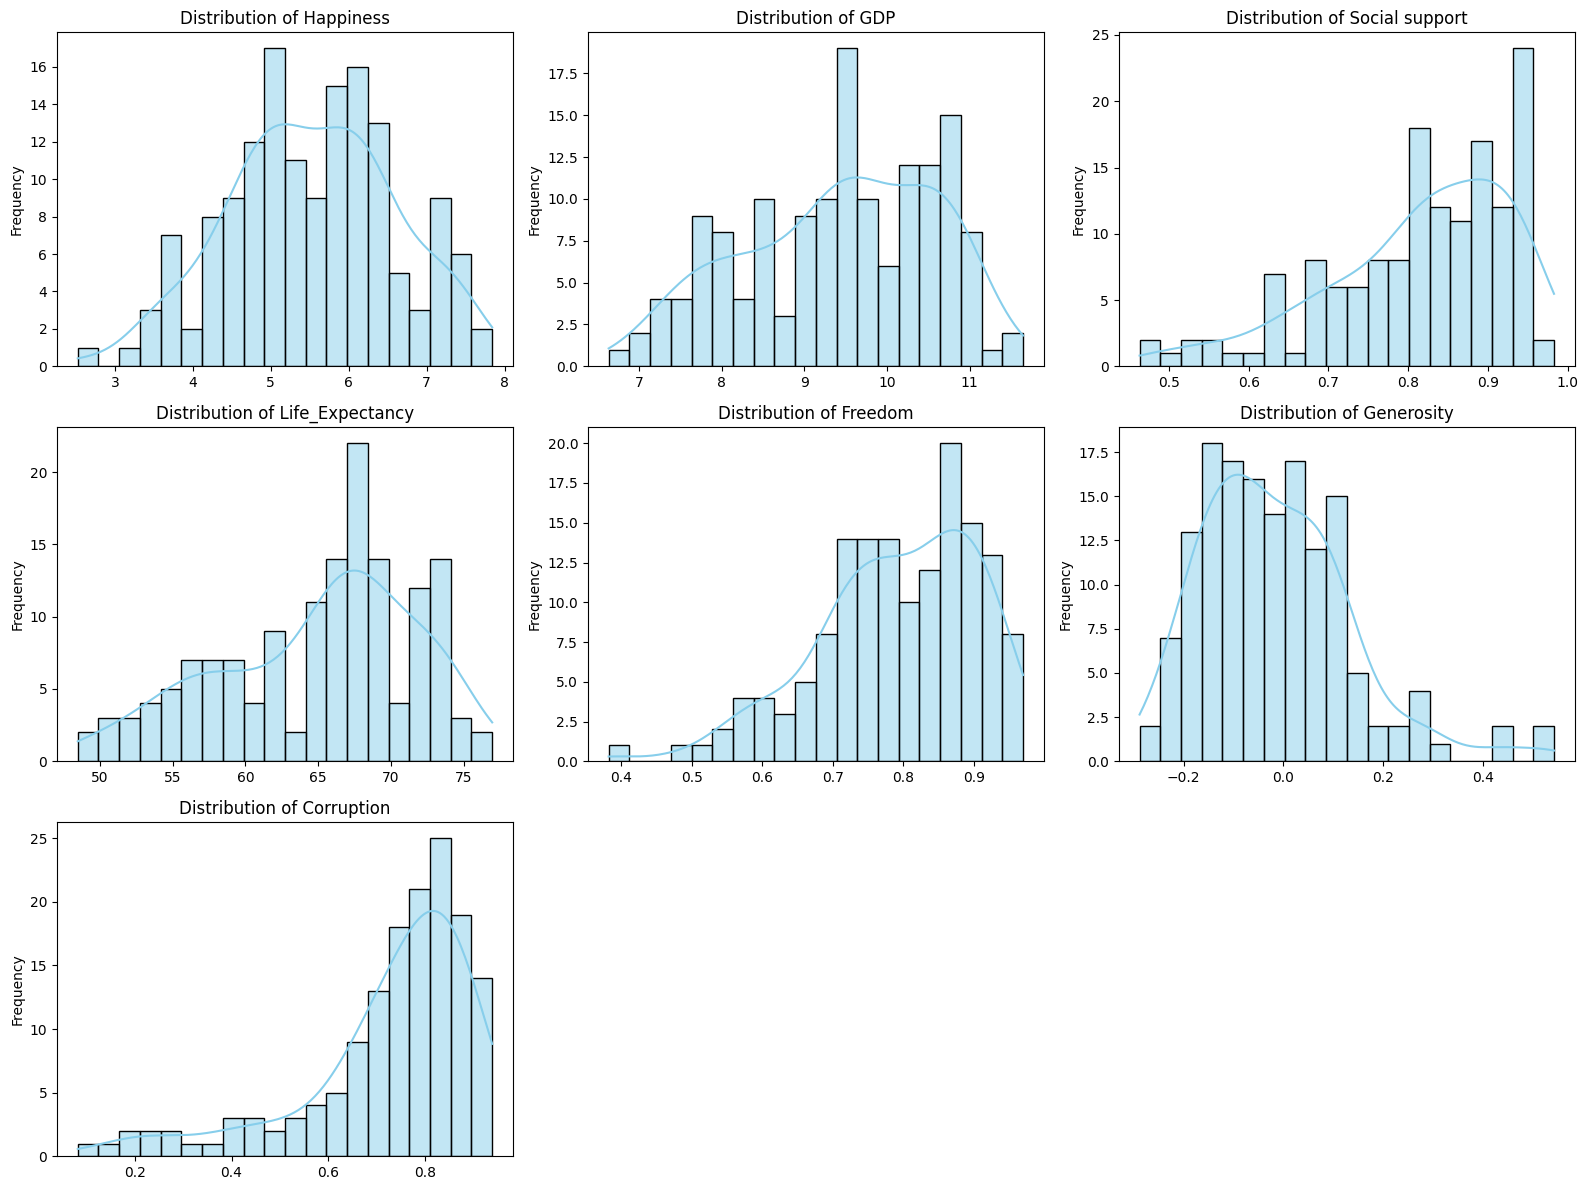

In [12]:
# List of numerical columns (excluding Country/Region)
numeric_cols = ['Happiness', 'GDP', 'Social support', 'Life_Expectancy',
                'Freedom', 'Generosity', 'Corruption']

# Define grid layout
num_cols = len(numeric_cols)
cols = 3
rows = math.ceil(num_cols / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, color='skyblue', bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


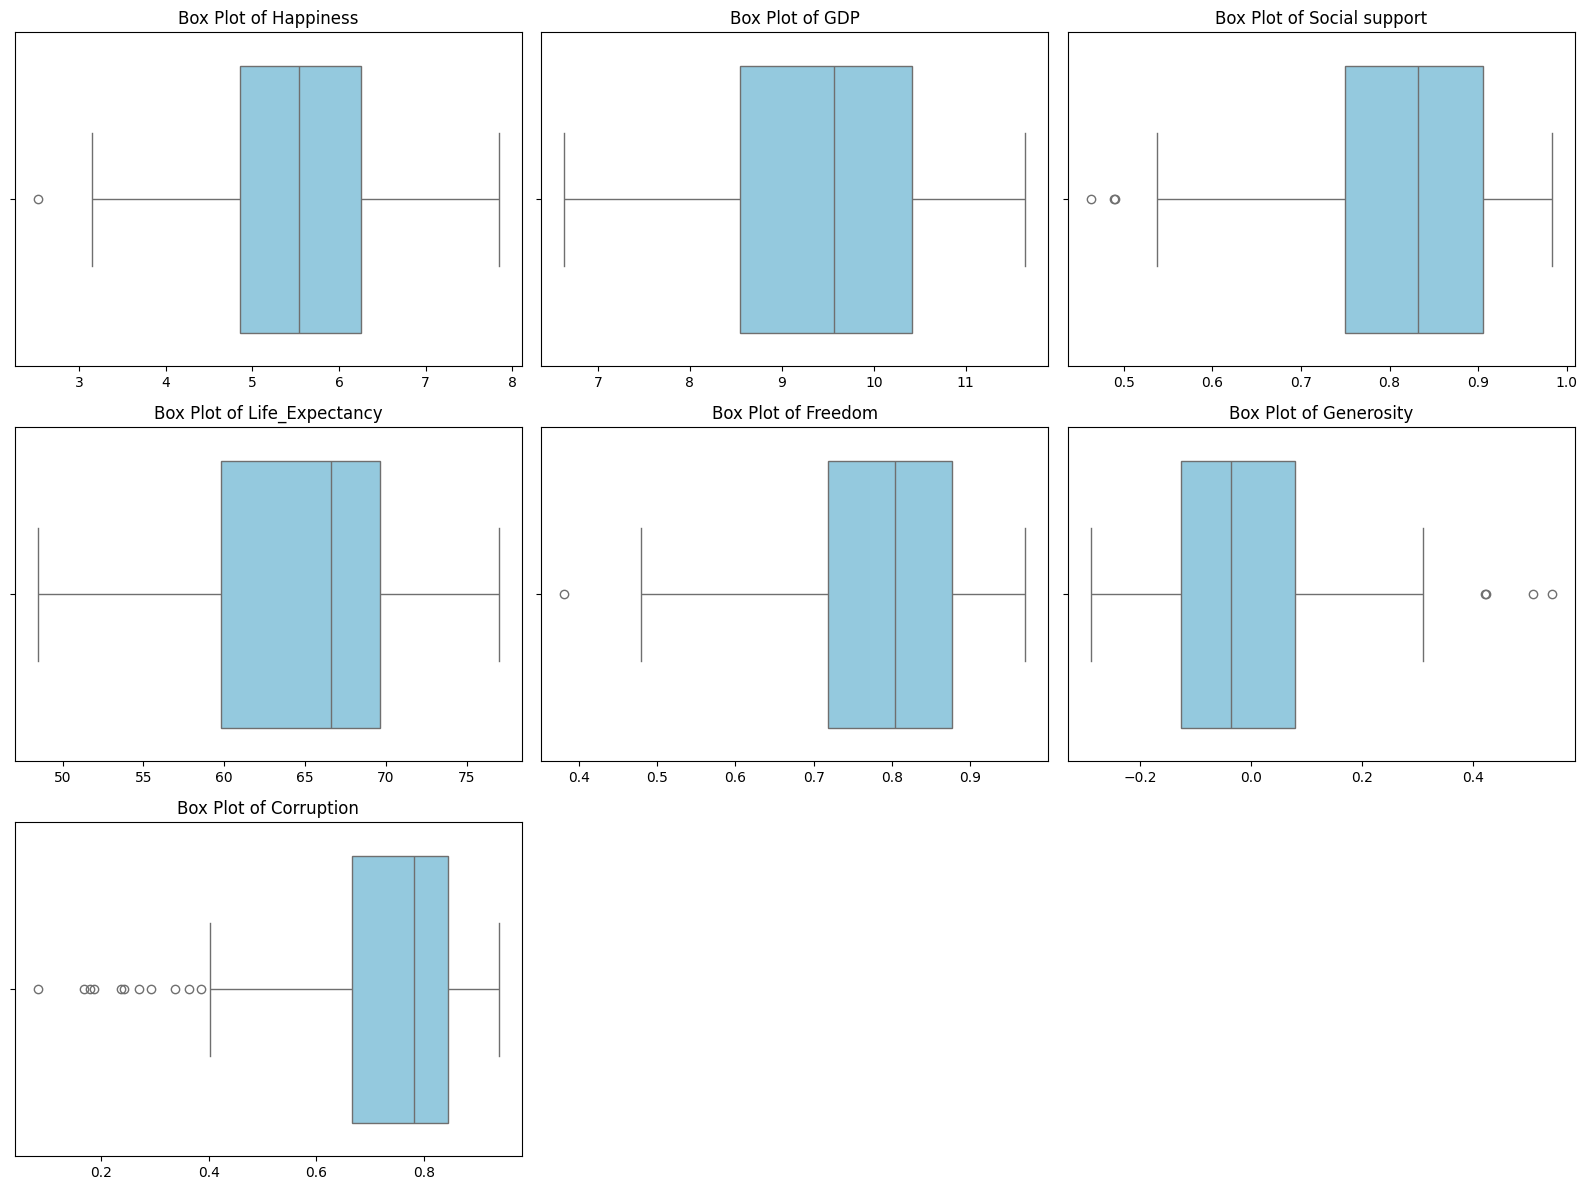

In [13]:
# Define grid layout
num_cols = len(numeric_cols)
cols = 3
rows = math.ceil(num_cols / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], color='skyblue', ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel('')


# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


### 🔎 Key Observations 

- Features like **GDP**, **Generosity**, and **Corruption** show significant **skewness and variance** 
- The target variable **Happiness** is fairly normally distributed.

C:\Users\DELL\AppData\Local\Temp\ipykernel_3000\1485720242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.values, y=region_counts.index, palette='viridis')


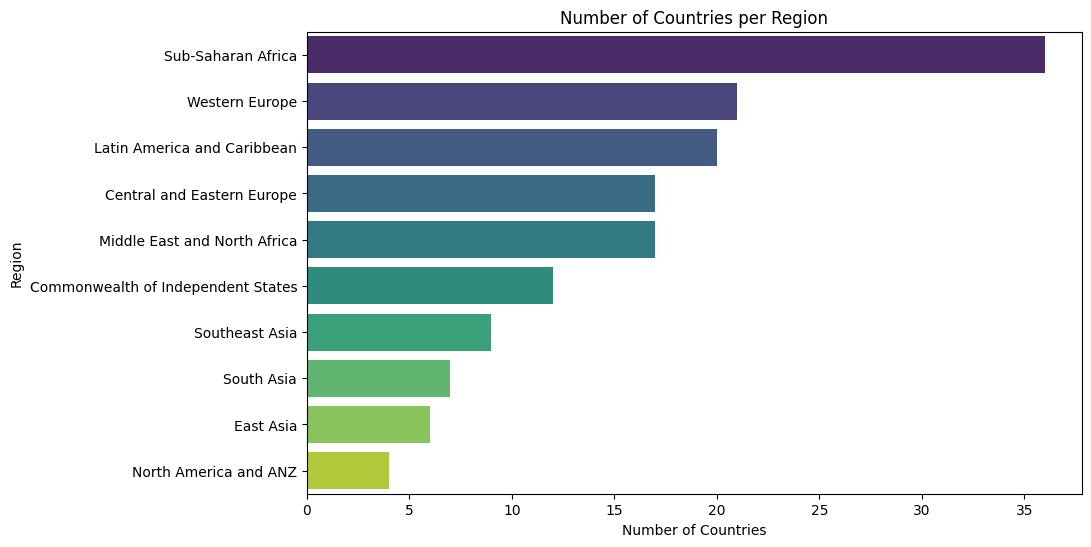

In [14]:
# Frequency count of countries per region
region_counts = df['Region'].value_counts()

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.values, y=region_counts.index, palette='viridis')
plt.title("Number of Countries per Region")
plt.xlabel("Number of Countries")
plt.ylabel("Region")
plt.show()


> 🔎 The most represented regions are:
> - Sub-Saharan Africa
> - Western Europe
> - Central and Eastern Europe  
>
> This gives us a good base for **regional comparisons** in later steps.


# 4. **Bivariate & Correlation Analysis**


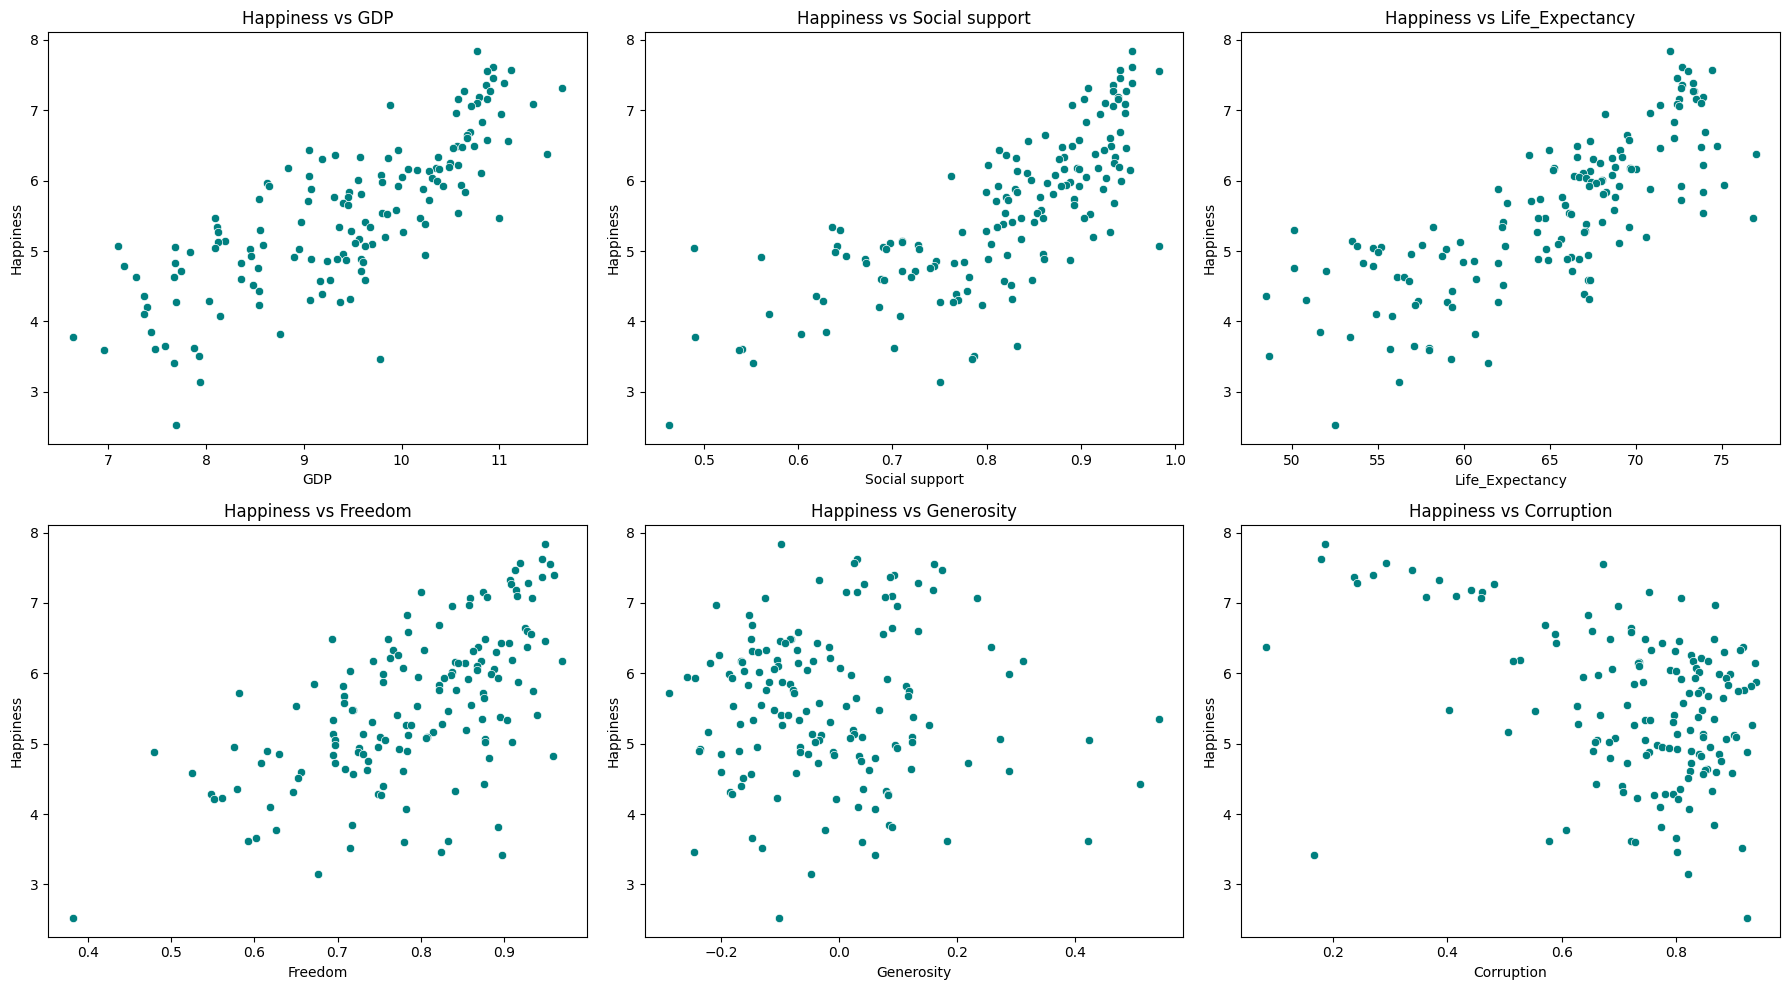

In [15]:
# Features to compare with Happiness
features = ['GDP', 'Social support', 'Life_Expectancy',
            'Freedom', 'Generosity', 'Corruption']

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Plot scatterplots
for i, feature in enumerate(features):
    sns.scatterplot(x=df[feature], y=df['Happiness'], ax=axes[i], color='teal')
    axes[i].set_title(f'Happiness vs {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Happiness')

plt.tight_layout()
plt.show()


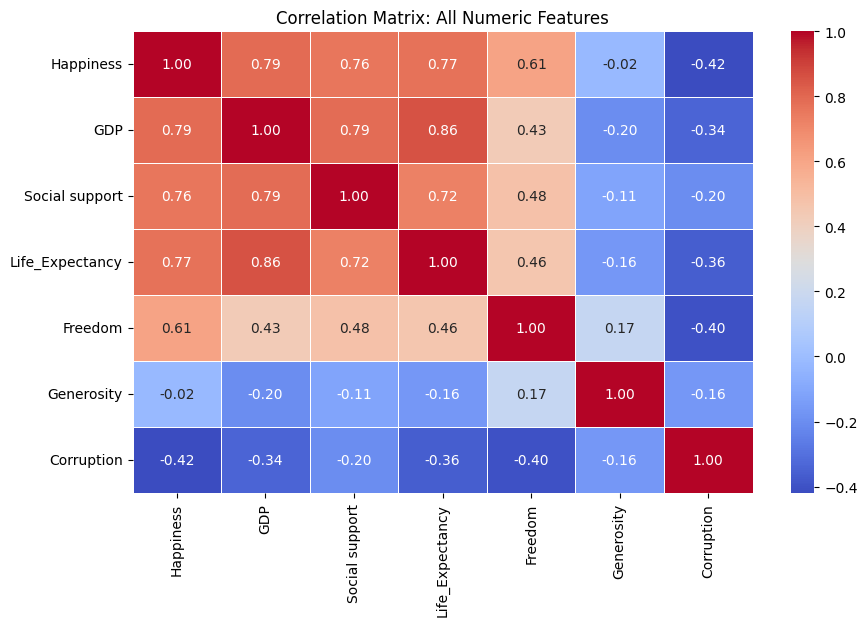

In [16]:
# Full correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot full heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: All Numeric Features")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_3000\3670659493.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=happiness_corr.values, y=happiness_corr.index, palette='crest')


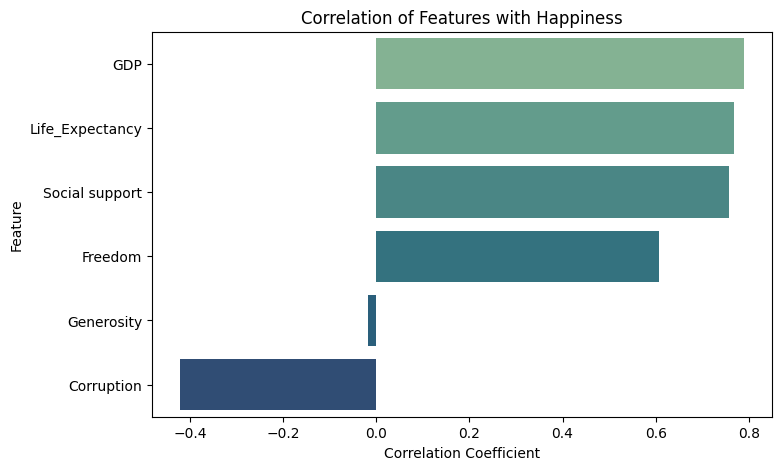

In [17]:
# Correlation of all variables with 'Happiness' only
happiness_corr = corr_matrix['Happiness'].drop('Happiness').sort_values(ascending=False)

# Option 1: Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=happiness_corr.values, y=happiness_corr.index, palette='crest')
plt.title("Correlation of Features with Happiness")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()


### 📌 Correlation Insights

- **GDP**, **Social Support**, and **Life Expectancy** show the **strongest positive correlation** with Happiness.
- **Freedom** is moderately positively correlated.
- **Generosity** and **Corruption perception** have **weak or inconsistent correlations**, indicating cultural/perceptual influence.
- Some scatter plots (e.g., Happiness vs GDP) suggest near-linear patterns; others (e.g., Generosity) are more diffuse.

### 🔍 Key Takeaway:
> Economic and social factors (GDP, support, health) are **most strongly linked** to happiness, while ethical/cultural factors (generosity, corruption) are **less consistent** predictors.


# 5. **Regional & Country-Level Comparisons**


C:\Users\DELL\AppData\Local\Temp\ipykernel_3000\2088573410.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.values, y=region_avg.index, palette='viridis')


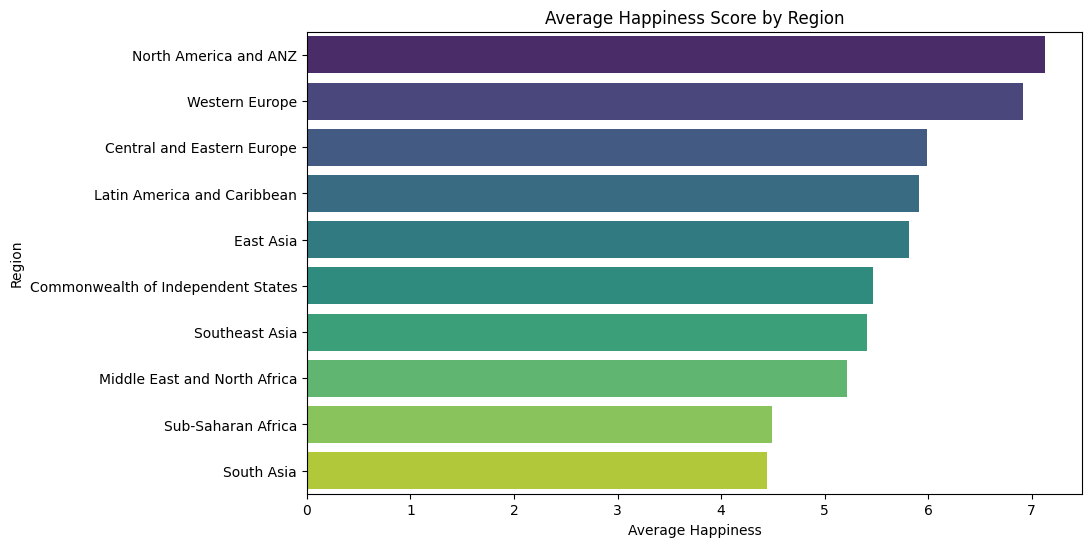

In [18]:
# Average happiness per region
region_avg = df.groupby('Region')['Happiness'].mean().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=region_avg.values, y=region_avg.index, palette='viridis')
plt.title("Average Happiness Score by Region")
plt.xlabel("Average Happiness")
plt.ylabel("Region")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_3000\4218288409.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y='Happiness', palette='coolwarm')


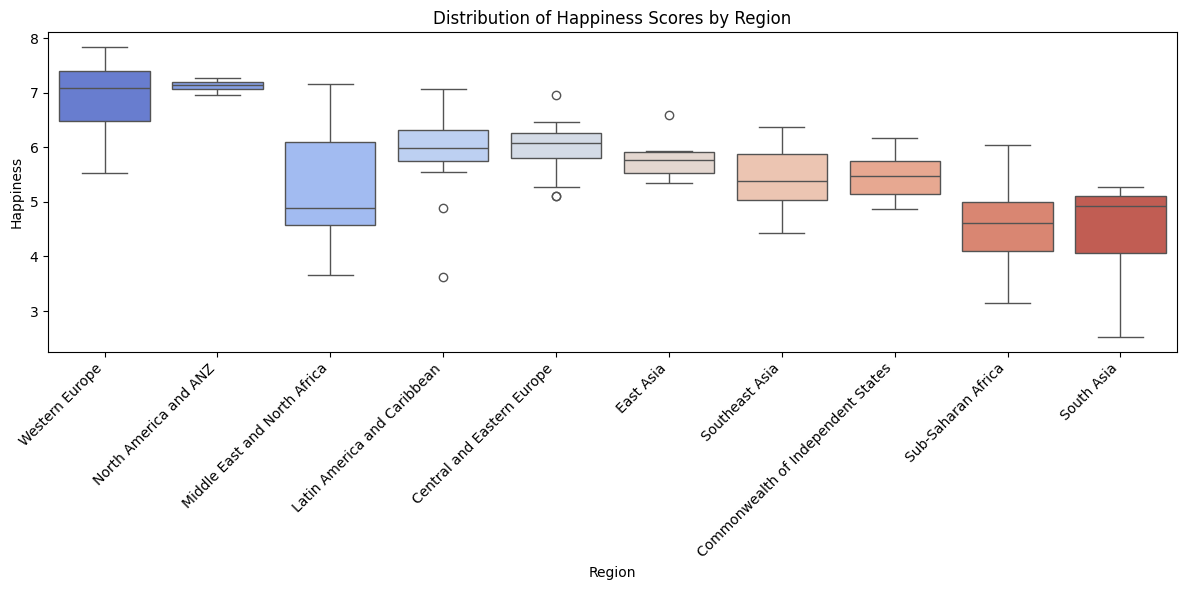

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Region', y='Happiness', palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Happiness Scores by Region")
plt.ylabel("Happiness")
plt.xlabel("Region")
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_3000\707000528.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y=col, palette='Set3')


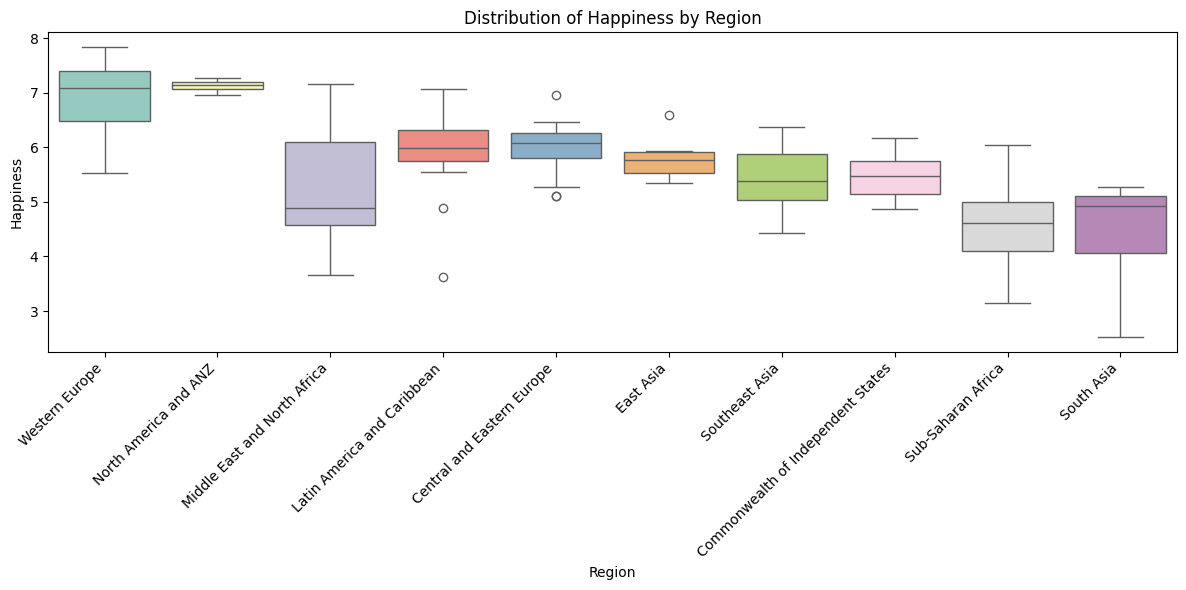

C:\Users\DELL\AppData\Local\Temp\ipykernel_3000\707000528.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y=col, palette='Set3')


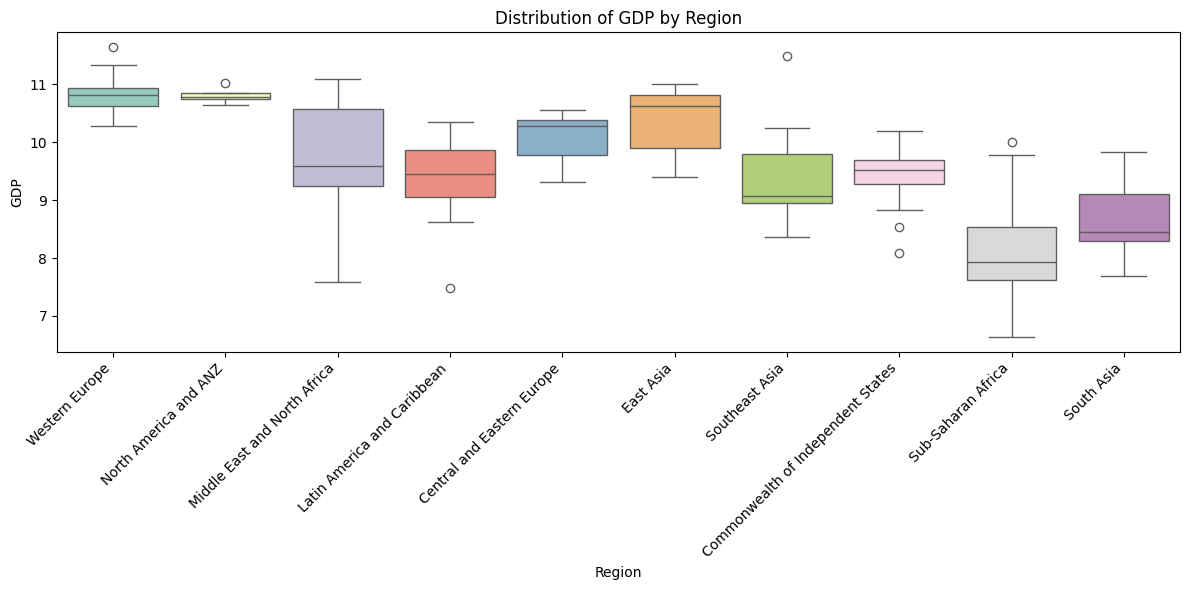

C:\Users\DELL\AppData\Local\Temp\ipykernel_3000\707000528.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y=col, palette='Set3')


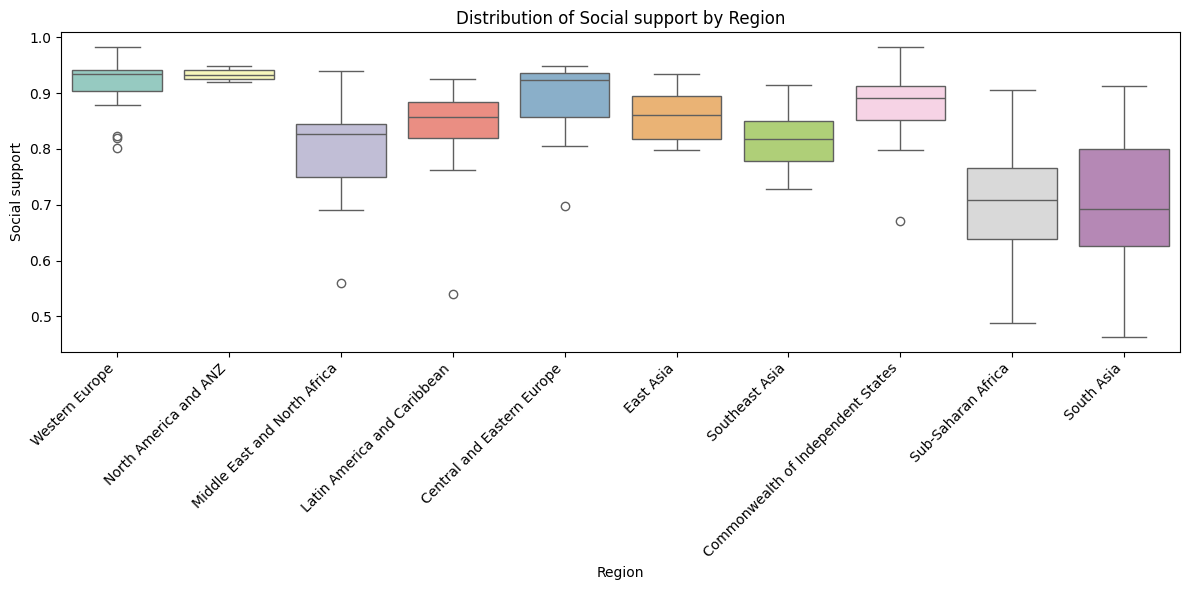

C:\Users\DELL\AppData\Local\Temp\ipykernel_3000\707000528.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y=col, palette='Set3')


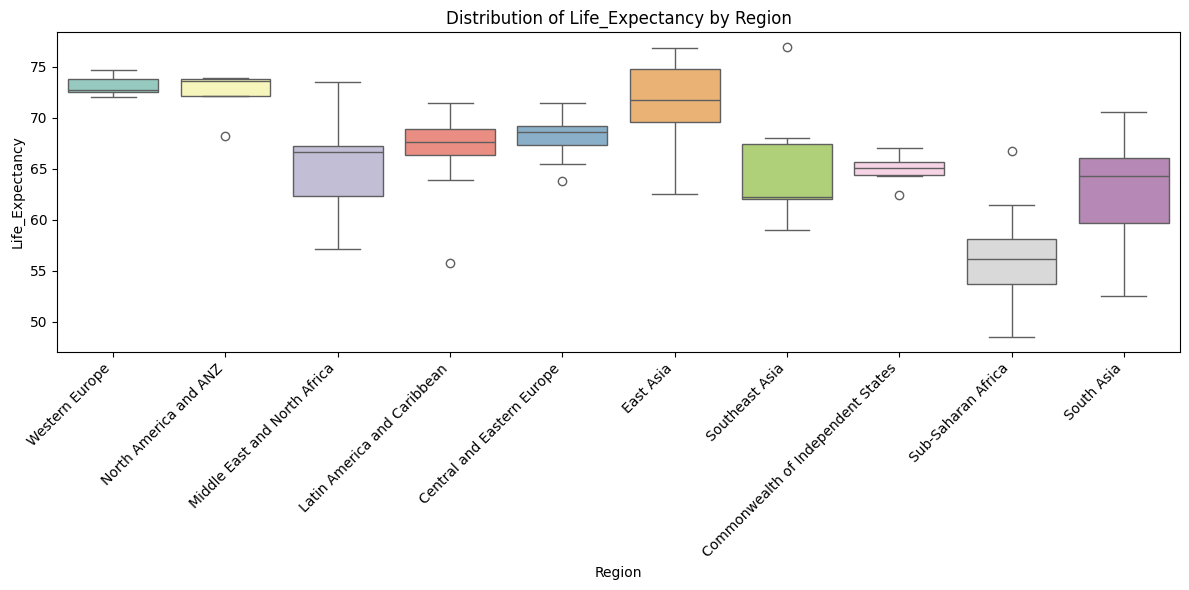

C:\Users\DELL\AppData\Local\Temp\ipykernel_3000\707000528.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y=col, palette='Set3')


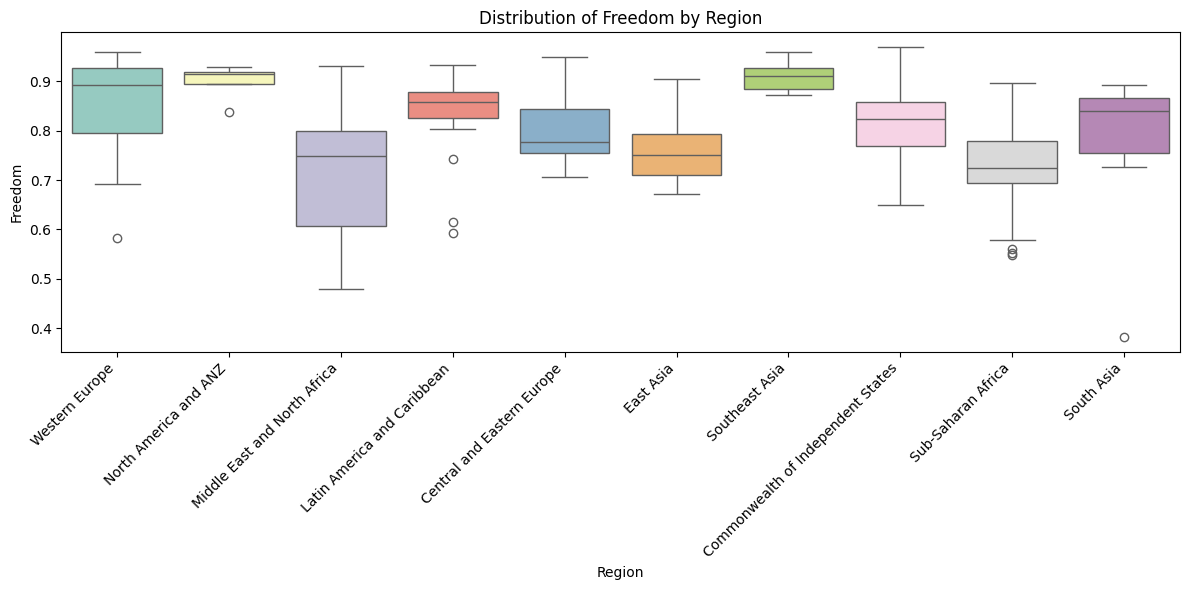

C:\Users\DELL\AppData\Local\Temp\ipykernel_3000\707000528.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y=col, palette='Set3')


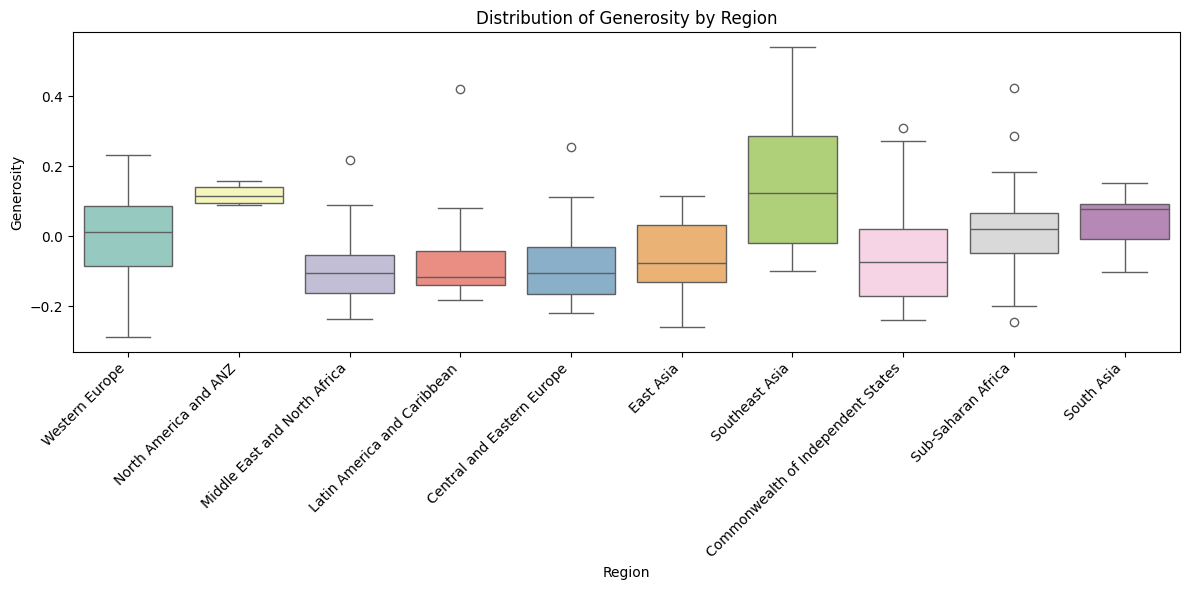

C:\Users\DELL\AppData\Local\Temp\ipykernel_3000\707000528.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y=col, palette='Set3')


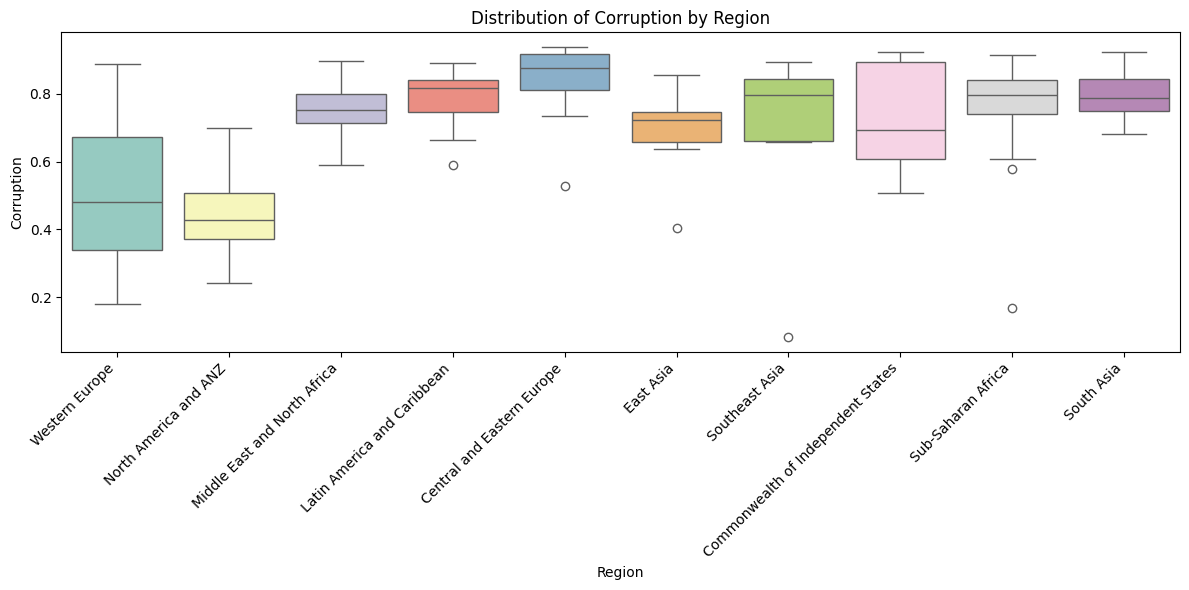

In [20]:
# Define columns to visualize (excluding Country and Region)
features_to_plot = ['Happiness', 'GDP', 'Social support', 'Life_Expectancy',
                    'Freedom', 'Generosity', 'Corruption']

# Loop over features and plot boxplots by region
for col in features_to_plot:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Region', y=col, palette='Set3')
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Distribution of {col} by Region")
    plt.xlabel("Region")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

### 📦 Regional Distributions Summary

Each boxplot shows how a specific variable is distributed across regions:

- **Western Europe** and **North America & ANZ** typically show higher medians for GDP, Life Expectancy, and Happiness.
- **Sub-Saharan Africa** tends to have the lowest medians and wider spreads in most indicators.
- Outliers in regions like **Middle East and North Africa** or **South Asia** reflect country-level exceptions (e.g., Gulf countries with high GDP but low freedom).
- **Social support** is more evenly distributed than most features.

> These visuals highlight how economic and social factors differ not only between countries but between entire regions.


C:\Users\DELL\AppData\Local\Temp\ipykernel_3000\3696551596.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Country', data=top10, ax=axes[i], palette='crest')
C:\Users\DELL\AppData\Local\Temp\ipykernel_3000\3696551596.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Country', data=top10, ax=axes[i], palette='crest')
C:\Users\DELL\AppData\Local\Temp\ipykernel_3000\3696551596.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Country', data=top10, ax=axes[i], palette='crest')
C:\Users\DELL\AppData\Local\

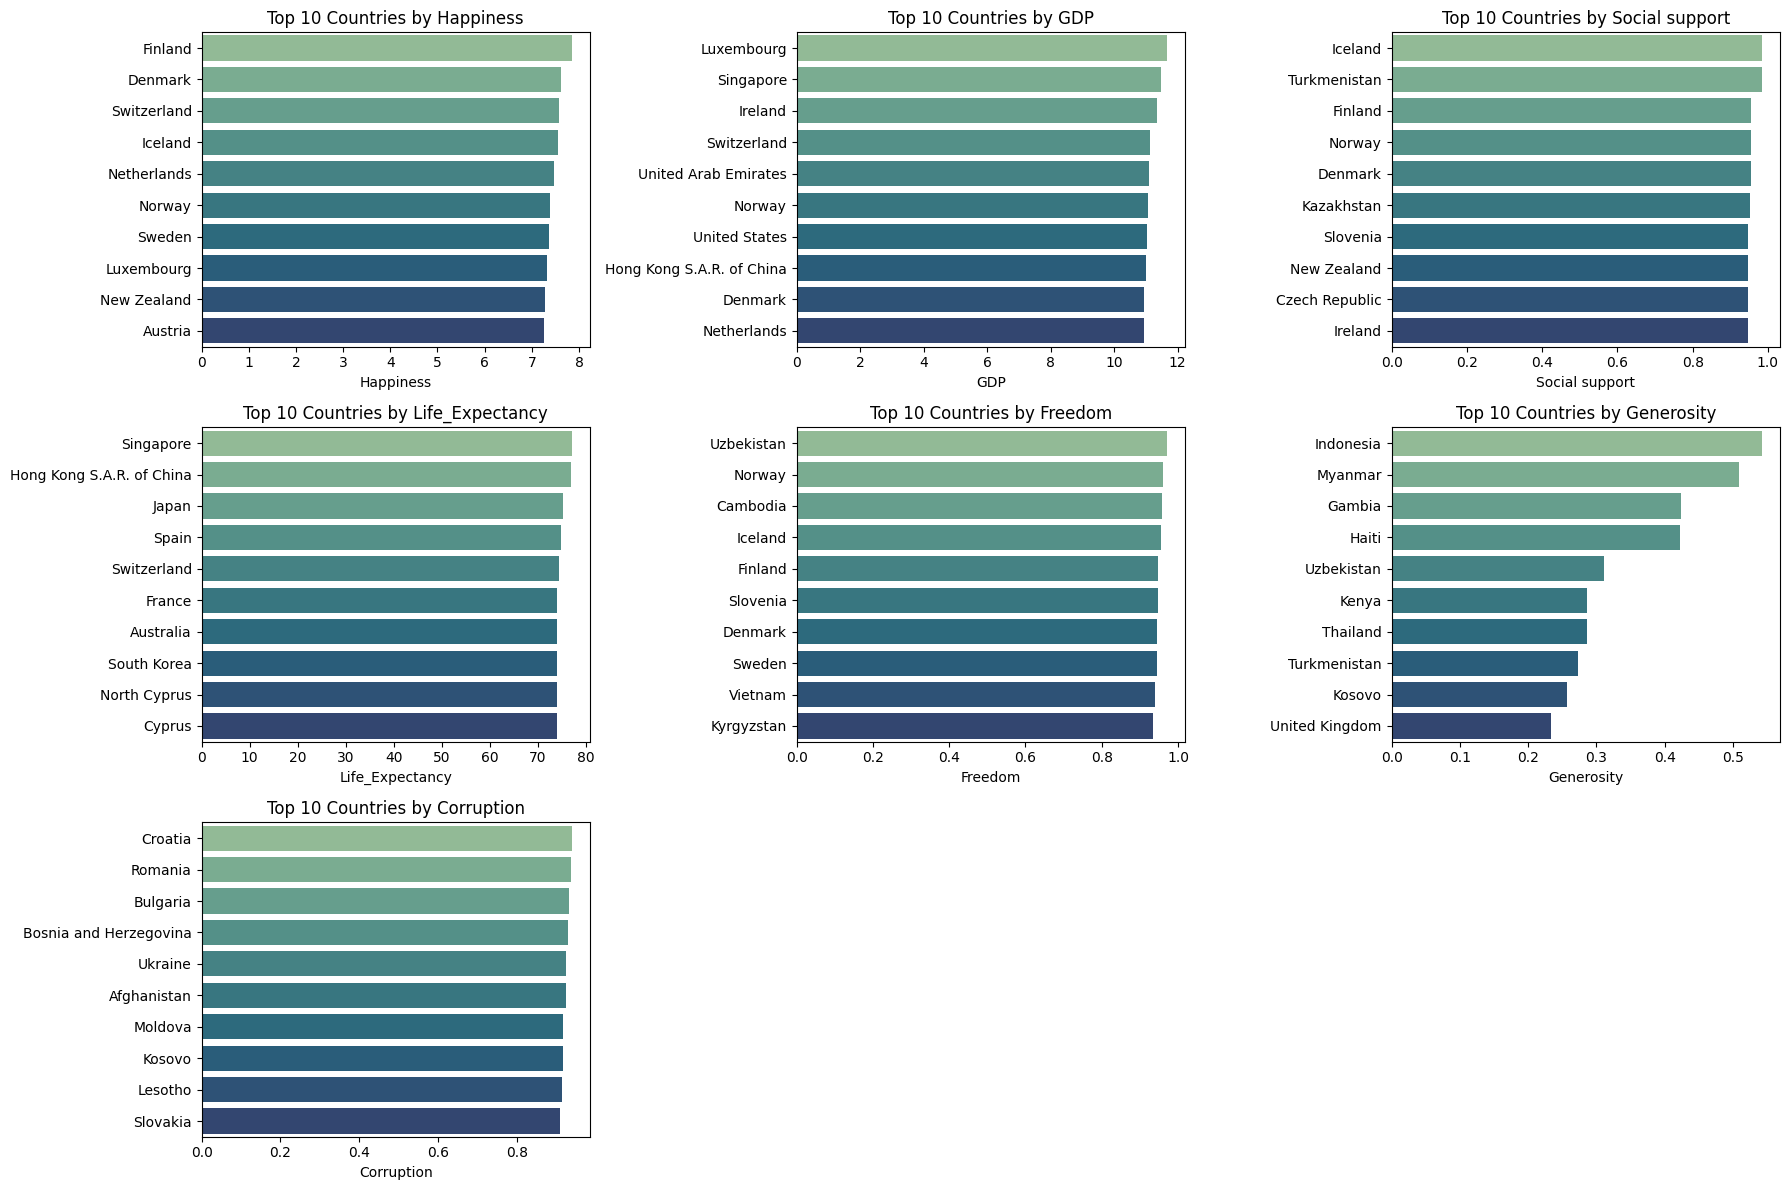

In [21]:
# Define columns to visualize (excluding Country and Region)
features = ['Happiness', 'GDP', 'Social support', 'Life_Expectancy',
                    'Freedom', 'Generosity', 'Corruption']

# Subplot layout
n_cols = 3
n_rows = math.ceil(len(features) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Plot top 10 bar charts
for i, col in enumerate(features):
    top10 = df[['Country', col]].sort_values(by=col, ascending=False).head(10)
    sns.barplot(x=col, y='Country', data=top10, ax=axes[i], palette='crest')
    axes[i].set_title(f"Top 10 Countries by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("")

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3000\3139352117.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Country', data=bottom10, ax=axes[i], palette='rocket')
C:\Users\DELL\AppData\Local\Temp\ipykernel_3000\3139352117.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Country', data=bottom10, ax=axes[i], palette='rocket')
C:\Users\DELL\AppData\Local\Temp\ipykernel_3000\3139352117.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Country', data=bottom10, ax=axes[i], palette='rocket')
C:\Users\DELL\AppDa

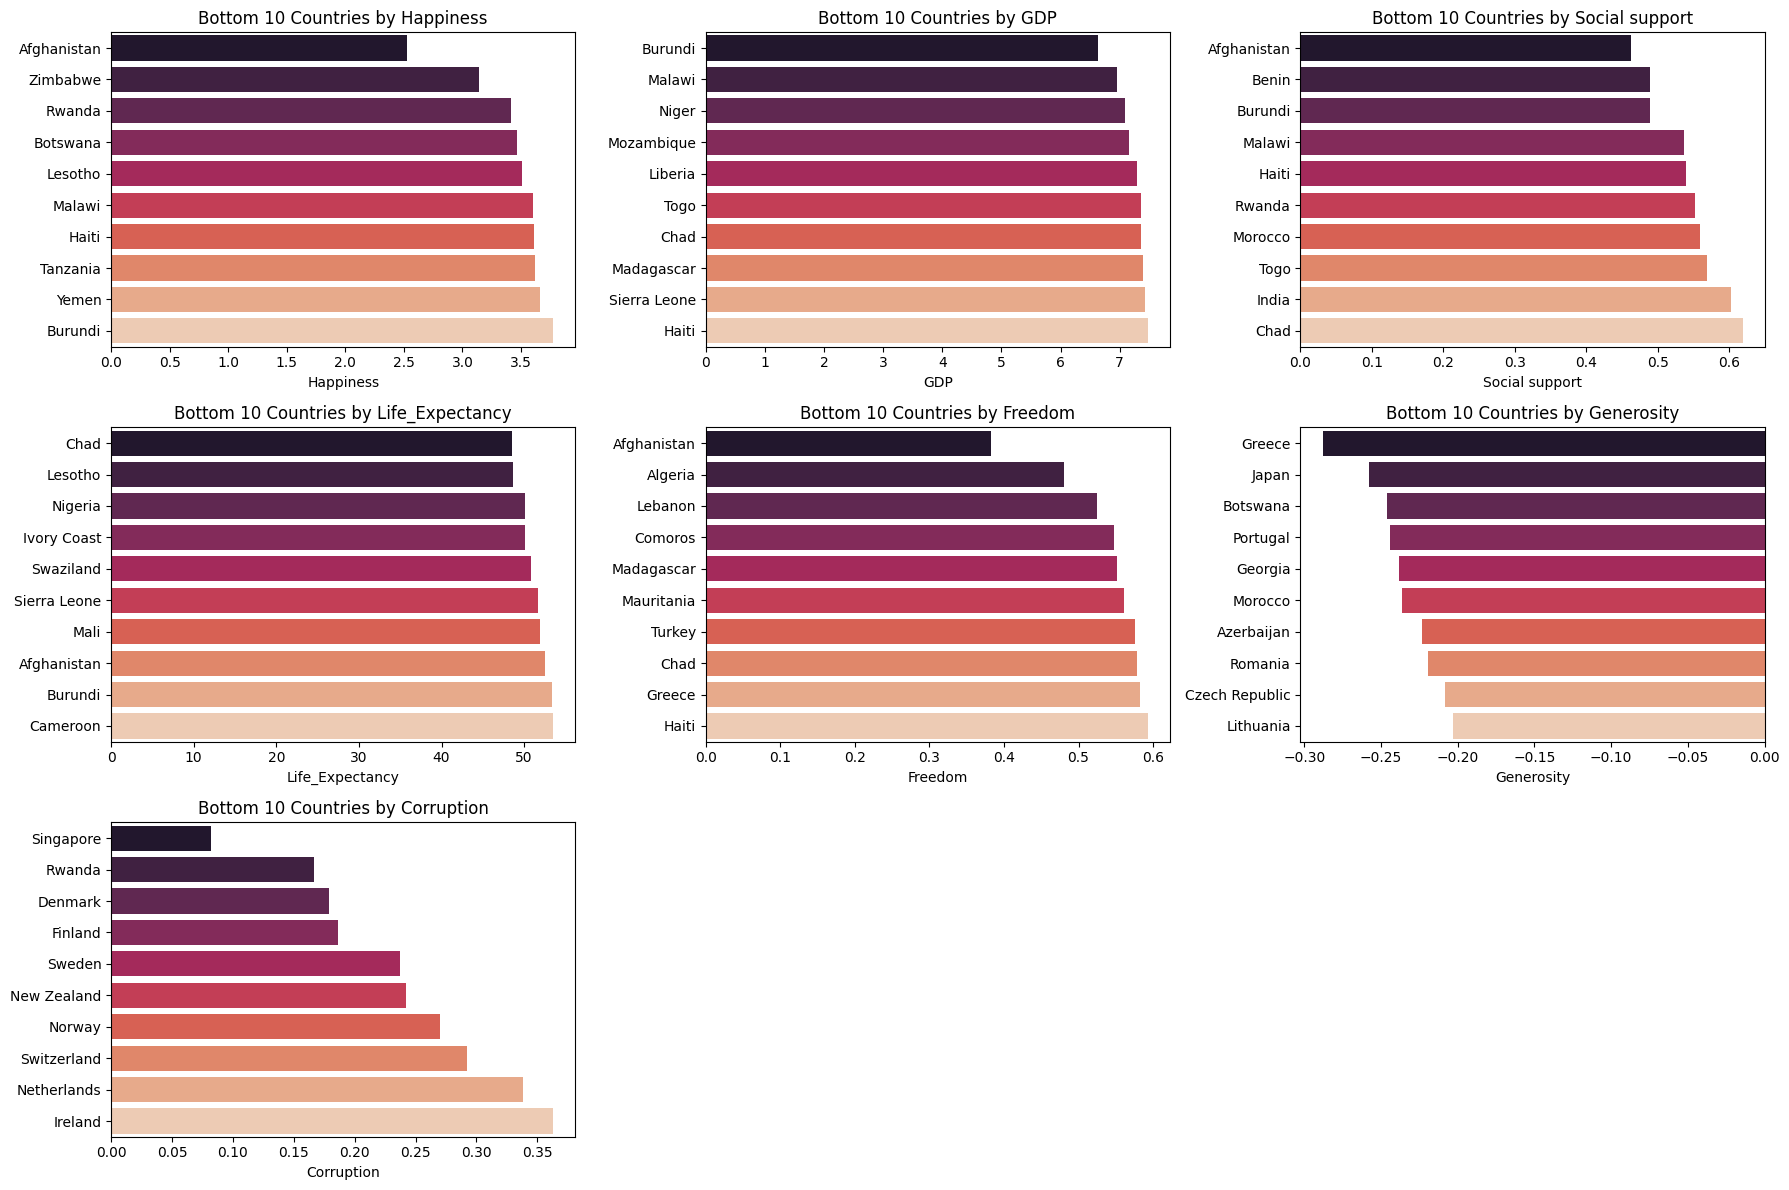

In [22]:
# Subplot layout for bottom 10
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Plot bottom 10 bar charts
for i, col in enumerate(features):
    bottom10 = df[['Country', col]].sort_values(by=col, ascending=True).head(10)
    sns.barplot(x=col, y='Country', data=bottom10, ax=axes[i], palette='rocket')
    axes[i].set_title(f"Bottom 10 Countries by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("")

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# 6. **Conclusions & Insights**


### 🔍 Key Findings:

1. **Top Influencers of Happiness**:
   - `GDP`, `Social support`, and `Life_Expectancy` show the **strongest positive correlations** with Happiness.
   - `Freedom` also contributes positively but with slightly less impact.
   - `Generosity` and `Corruption` show **weaker and more variable** relationships — possibly due to cultural or perceptual differences.

2. **Regional Trends**:
   - **Western Europe** and **North America & ANZ** consistently rank highest in most features, especially `Happiness`, `GDP`, and `Freedom`.
   - **Sub-Saharan Africa** and parts of **South Asia** score lowest in both `Happiness` and `Life Expectancy`.

3. **Top & Bottom Countries**:
   - Countries like **Finland, Denmark, Switzerland** appear frequently in the top 10 across many features.
   - Countries with low scores tend to rank low in multiple features — not just one — emphasizing the interconnected nature of well-being.

---

### 📌 Overall Conclusion:

> The World Happiness Report data clearly shows that economic prosperity, strong social networks, and health are key contributors to happiness worldwide.  
> While ethical factors like generosity and perceived corruption matter, their impact appears **less direct** and more culturally nuanced.

---

### 🚀 Further Steps :
- Create an **interactive dashboard** (e.g., using Plotly or Streamlit)
- Compare with past years to analyze **trends over time**
- Build a **Regression or ML model** to predict Happiness based on features


